In [1]:
import numpy as np
import matplotlib.pyplot as plt

Unidade Astronômica $= 1,5 \cdot 10^8 km$<br>
Massa da Terra $= 5,972 \cdot 10^{24} kg$<br>
Massa do Sol $ = 1,989 \cdot 10^{30} kg$<br>
Constante Gravitacional = $6.67408 \cdot 10^{-11} m^{3} kg^{-1} s^{-2}$

$$
F = ma
$$

$$
F = G\frac{m_1m_2}{||r^2||}
$$

\begin{align}
m_1\ddot{r} &= G\frac{m_1m_2}{||r^2||}\\
\end{align}
Com $r = |x_1 - x_2|$, como queremos o vetor na direção do astro, vamos multiplicar pelo unitario de r

$$
m_1\ddot{r} = G\frac{m_1m_2}{||r^2||}\frac{r}{||r||}
$$

$$
m_1\ddot{r} = G\frac{r m_1m_2}{||r^3||}
$$

In [14]:
G = 6.67408

In [15]:
u = [1,0,0,0,0.1,0.2,0,0]
du = [u[2],u[3],G*m[1]*(u[4]-u[0])/np.sqrt((u[4]-u[0])**2 + (u[5]-u[1])**2), G*m[0]*(u[5]-u[1])/np.sqrt((u[4]-u[0])**2 + (u[5]-u[1])**2),u[6],u[7],G*m[0]*(u[4]-u[0])/np.sqrt((u[4]-u[0])**2 + (u[5]-u[1])**2),G*m[1]*(u[5]-u[1])/np.sqrt((u[4]-u[0])**2 + (u[5]-u[1])**2)]
m = [1.989*10**6,5.972]

In [16]:
def F(u,t):
    return np.array([u[2],u[3],G*m[1]*(u[4]-u[0])/np.sqrt((u[4]-u[0])**2 + (u[5]-u[1])**2), G*m[0]*(u[5]-u[1])/np.sqrt((u[4]-u[0])**2 + (u[5]-u[1])**2),u[6],u[7],G*m[0]*(u[4]-u[0])/np.sqrt((u[4]-u[0])**2 + (u[5]-u[1])**2),G*m[1]*(u[5]-u[1])/np.sqrt((u[4]-u[0])**2 + (u[5]-u[1])**2)])

In [17]:
def rk_2(F, y0, ts):
    ys = [y0]
    t = ts[0]
    h = ts[1] - ts[0]
    for tnext in ts:
        k1 = F(ys[-1], t)
        k2 = F(ys[-1] + h*k1,tnext)
        ynext = ys[-1] + h * (k1+k2) / 2.0
        ys.append(ynext)
        t = tnext
    return np.array(ys[:-1])

In [18]:
ts = np.linspace(-25000,25000,3000)
ys = rk_2(F,u,ts)
len(ys)

3000

In [21]:
ys[2][1]

800449248.8046808

In [22]:
x1 = [i[0] for i in ys]
y1 = [i[1] for i in ys]
x2 = [i[4] for i in ys]
y2 = [i[5] for i in ys]

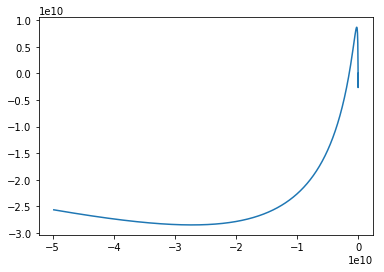

In [23]:
plt.plot(x1,y1)

In [24]:
m = [1.989*10**30,5.972*10**24]
G = 6.67408*10**(-11)
d = 1.5*10**(8)

In [25]:
def model(r,t):
    vdot,v = r
    return [v,G * m[0]/r[0]**2]

In [26]:
model([2,3],5)

[3, 3.31868628e+19]

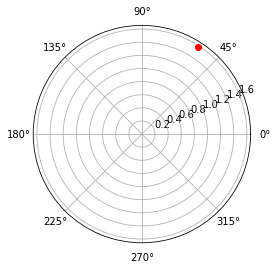

In [27]:
plt.polar(1,np.pi/2,'ro')
plt.show()

In [28]:
def G(p):
    return [1]*500

In [29]:
ps = np.linspace(0,2*np.pi,500)

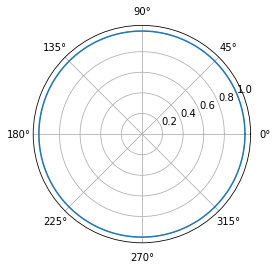

In [30]:
plt.polar(ps,G(ps))

In [31]:
def X(p):
    return 2*np.cos(p)
def Y(p):
    return 2*np.sin(p)

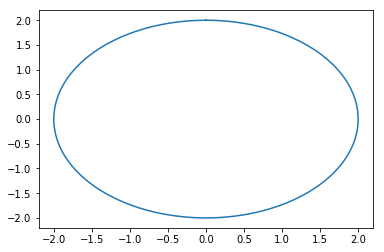

In [32]:
plt.plot(Y(ps),X(ps))
plt.show()

In [33]:
r0 = [1.496*10**11,0]
t0 = [np.pi/6,1.990989*10**(-7)]
Gconst = 6.67408*10**(-11)

In [34]:
def modelR(r,t):
    r2,rdot = r
    rnew = r[0]*t[1]**2 - Gconst * m[0]*r[0]**2
    return [rdot, rnew]

def modelT(r,t):
    t,tdot = t
    tnew = -2*r[1]*t[1]/r[0]
    return [tdot,tnew]

In [35]:
r3 = modelR(r0,t0)

In [36]:
paramsR = [[1.496*10**11],[0]]
paramsT = [[np.pi/6],[1.990989*10**(-7)]]

m = [1.9*10**30,5.972*10**24]
Gconst = 6.67408*10**(-11)

def RDDOT():
    return paramsR[0][-1]*paramsT[1][-1]**2 - Gconst * m[0]/paramsR[0][-1]

def TDDOT():
    return -2.0*paramsR[1][-1]*paramsT[1][-1]/paramsR[0][-1]

In [37]:
def newvalue(curr, dt, acc):
    return curr + dt*acc

In [38]:
dt = 90
for i in range(20):
    dist = RDDOT()
    paramsR[1].append(newvalue(paramsR[1][-1],dt,dist))
    paramsR[0].append(newvalue(paramsR[0][-1],dt,dist))
    angle = TDDOT()
    paramsT[1].append(newvalue(paramsT[1][-1],dt,angle))
    paramsT[0].append(newvalue(paramsT[0][-1],dt,angle))

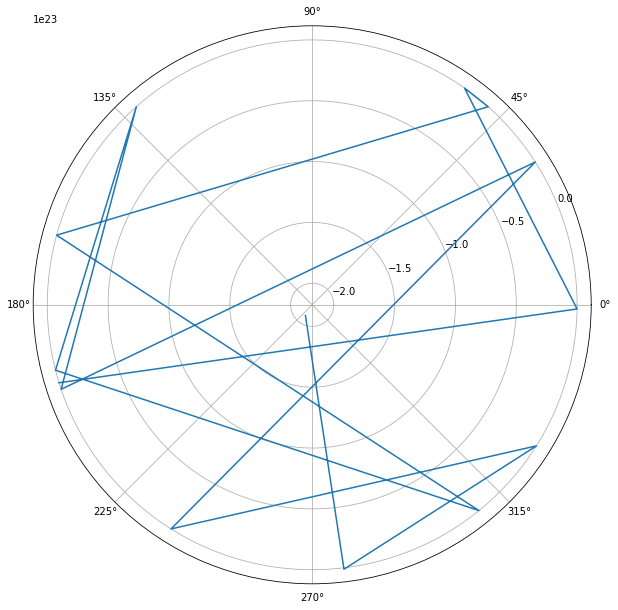

In [39]:
plt.figure(figsize=(10,20))
plt.polar(paramsR[0],paramsT[0])
plt.show()

In [40]:
def X(r,t):
    return r*np.cos(t)
def Y(r,t):
    return r*np.sin(t)

In [45]:
#!/usr/bin/env python3

import math
from turtle import *

# The gravitational constant G
G = 6.67428e-11

# Assumed scale: 100 pixels = 1AU.
AU = (149.6e6 * 1000)     # 149.6 million km, in meters.
SCALE = 250 / AU

class Body(Turtle):
    """Subclass of Turtle representing a gravitationally-acting body.

    Extra attributes:
    mass : mass in kg
    vx, vy: x, y velocities in m/s
    px, py: x, y positions in m
    """
    
    name = 'Body'
    mass = None
    vx = vy = 0.0
    px = py = 0.0
    
    def attraction(self, other):
        """(Body): (fx, fy)

        Returns the force exerted upon this body by the other body.
        """
        # Report an error if the other object is the same as this one.
        if self is other:
            raise ValueError("Attraction of object %r to itself requested"
                             % self.name)

        # Compute the distance of the other body.
        sx, sy = self.px, self.py
        ox, oy = other.px, other.py
        dx = (ox-sx)
        dy = (oy-sy)
        d = math.sqrt(dx**2 + dy**2)

        # Report an error if the distance is zero; otherwise we'll
        # get a ZeroDivisionError exception further down.
        if d == 0:
            raise ValueError("Collision between objects %r and %r"
                             % (self.name, other.name))

        # Compute the force of attraction
        f = G * self.mass * other.mass / (d**2)

        # Compute the direction of the force.
        theta = math.atan2(dy, dx)
        fx = math.cos(theta) * f
        fy = math.sin(theta) * f
        return fx, fy

def update_info(step, bodies):
    """(int, [Body])
    
    Displays information about the status of the simulation.
    """
    print('Step #{}'.format(step))
    for body in bodies:
        s = '{:<8}  Pos.={:>6.2f} {:>6.2f} Vel.={:>10.3f} {:>10.3f}'.format(
            body.name, body.px/AU, body.py/AU, body.vx, body.vy)
        print(s)
    print()

def loop(bodies):
    """([Body])

    Never returns; loops through the simulation, updating the
    positions of all the provided bodies.
    """
    timestep = 24*3600  # One day
    
    for body in bodies:
        body.penup()
        body.hideturtle()

    step = 1
    while True:
        update_info(step, bodies)
        step += 1

        force = {}
        for body in bodies:
            # Add up all of the forces exerted on 'body'.
            total_fx = total_fy = 0.0
            for other in bodies:
                # Don't calculate the body's attraction to itself
                if body is other:
                    continue
                fx, fy = body.attraction(other)
                total_fx += fx
                total_fy += fy

            # Record the total force exerted.
            force[body] = (total_fx, total_fy)

        # Update velocities based upon on the force.
        for body in bodies:
            fx, fy = force[body]
            body.vx += fx / body.mass * timestep
            body.vy += fy / body.mass * timestep

            # Update positions
            body.px += body.vx * timestep
            body.py += body.vy * timestep
            body.goto(body.px*SCALE, body.py*SCALE)
            body.dot(3)


def main():
    sun = Body()
    sun.name = 'Sun'
    sun.mass = 1.98892 * 10**30
    sun.pencolor('yellow')

    earth = Body()
    earth.name = 'Earth'
    earth.mass = 5.9742 * 10**24
    earth.px = -1*AU
    earth.vy = 29.783 * 1000            # 29.783 km/sec
    earth.pencolor('blue')

    # Venus parameters taken from
    # http://nssdc.gsfc.nasa.gov/planetary/factsheet/venusfact.html
    venus = Body()
    venus.name = 'Venus'
    venus.mass = 4.8685 * 10**24
    venus.px = 0.723 * AU
    venus.vy = -35.02 * 1000
    venus.pencolor('red')

    loop([sun, earth, venus])

if __name__ == '__main__':
    main()

Step #1
Sun       Pos.=  0.00   0.00 Vel.=     0.000      0.000
Earth     Pos.= -1.00   0.00 Vel.=     0.000  29783.000
Venus     Pos.=  0.72   0.00 Vel.=     0.000 -35020.000

Step #2
Sun       Pos.=  0.00   0.00 Vel.=     0.001      0.000
Earth     Pos.= -1.00   0.02 Vel.=   512.475  29783.000
Venus     Pos.=  0.72  -0.02 Vel.=  -980.383 -35020.000

Step #3
Sun       Pos.=  0.00  -0.00 Vel.=     0.002     -0.000
Earth     Pos.= -1.00   0.03 Vel.=  1025.026  29774.181
Venus     Pos.=  0.72  -0.04 Vel.= -1961.151 -34992.542

Step #4
Sun       Pos.=  0.00  -0.00 Vel.=     0.003     -0.000
Earth     Pos.= -1.00   0.05 Vel.=  1537.501  29756.538
Venus     Pos.=  0.72  -0.06 Vel.= -2941.533 -34937.583

Step #5
Sun       Pos.=  0.00  -0.00 Vel.=     0.003     -0.000
Earth     Pos.= -1.00   0.07 Vel.=  2049.748  29730.068
Venus     Pos.=  0.72  -0.08 Vel.= -3920.756 -34855.102

Step #6
Sun       Pos.=  0.00  -0.00 Vel.=     0.004     -0.000
Earth     Pos.= -1.00   0.09 Vel.=  2561.615  29694

Step #48
Sun       Pos.=  0.00  -0.00 Vel.=     0.019     -0.037
Earth     Pos.= -0.68   0.72 Vel.= 21735.130  20637.392
Venus     Pos.=  0.17  -0.69 Vel.=-34454.639  -8605.438

Step #49
Sun       Pos.=  0.00  -0.00 Vel.=     0.019     -0.038
Earth     Pos.= -0.67   0.73 Vel.= 22091.513  20260.104
Venus     Pos.=  0.15  -0.70 Vel.=-34688.656  -7624.904

Step #50
Sun       Pos.=  0.00  -0.00 Vel.=     0.018     -0.040
Earth     Pos.= -0.66   0.75 Vel.= 22441.342  19876.583
Venus     Pos.=  0.13  -0.70 Vel.=-34894.411  -6637.843

Step #51
Sun       Pos.=  0.00  -0.00 Vel.=     0.017     -0.041
Earth     Pos.= -0.64   0.76 Vel.= 22784.505  19486.945
Venus     Pos.=  0.11  -0.71 Vel.=-35071.713  -5645.091

Step #52
Sun       Pos.=  0.00  -0.00 Vel.=     0.017     -0.042
Earth     Pos.= -0.63   0.77 Vel.= 23120.893  19091.306
Venus     Pos.=  0.08  -0.71 Vel.=-35220.395  -4647.489

Step #53
Sun       Pos.=  0.00  -0.00 Vel.=     0.016     -0.043
Earth     Pos.= -0.62   0.78 Vel.= 23450.399 

Step #95
Sun       Pos.=  0.00  -0.00 Vel.=    -0.050     -0.068
Earth     Pos.=  0.06   0.99 Vel.= 30002.110  -1672.455
Venus     Pos.= -0.64  -0.32 Vel.=-16401.085  31240.623

Step #96
Sun       Pos.=  0.00  -0.00 Vel.=    -0.052     -0.067
Earth     Pos.=  0.08   0.99 Vel.= 29968.414  -2192.981
Venus     Pos.= -0.65  -0.30 Vel.=-15508.649  31679.575

Step #97
Sun       Pos.=  0.00  -0.00 Vel.=    -0.054     -0.067
Earth     Pos.=  0.10   0.99 Vel.= 29925.611  -2712.831
Venus     Pos.= -0.66  -0.28 Vel.=-14604.753  32092.743

Step #98
Sun       Pos.=  0.00  -0.00 Vel.=    -0.056     -0.066
Earth     Pos.=  0.12   0.98 Vel.= 29873.714  -3231.843
Venus     Pos.= -0.67  -0.26 Vel.=-13690.155  32479.847

Step #99
Sun       Pos.=  0.00  -0.00 Vel.=    -0.058     -0.065
Earth     Pos.=  0.13   0.98 Vel.= 29812.741  -3749.855
Venus     Pos.= -0.68  -0.24 Vel.=-12765.624  32840.627

Step #100
Sun       Pos.= -0.00  -0.00 Vel.=    -0.060     -0.065
Earth     Pos.=  0.15   0.98 Vel.= 29742.709

Step #141
Sun       Pos.= -0.00  -0.00 Vel.=    -0.120      0.013
Earth     Pos.=  0.76   0.64 Vel.= 19700.019 -22580.873
Venus     Pos.= -0.49   0.54 Vel.= 24952.163  24115.540

Step #142
Sun       Pos.= -0.00  -0.00 Vel.=    -0.121      0.015
Earth     Pos.=  0.77   0.63 Vel.= 19304.095 -22915.956
Venus     Pos.= -0.48   0.55 Vel.= 25604.084  23408.018

Step #143
Sun       Pos.= -0.00  -0.00 Vel.=    -0.121      0.018
Earth     Pos.=  0.78   0.62 Vel.= 18902.488 -23244.022
Venus     Pos.= -0.46   0.56 Vel.= 26236.002  22683.261

Step #144
Sun       Pos.= -0.00  -0.00 Vel.=    -0.121      0.021
Earth     Pos.=  0.79   0.60 Vel.= 18495.324 -23564.976
Venus     Pos.= -0.45   0.58 Vel.= 26847.481  21941.833

Step #145
Sun       Pos.= -0.00  -0.00 Vel.=    -0.121      0.024
Earth     Pos.=  0.80   0.59 Vel.= 18082.732 -23878.726
Venus     Pos.= -0.43   0.59 Vel.= 27438.104  21184.303

Step #146
Sun       Pos.= -0.00  -0.00 Vel.=    -0.122      0.026
Earth     Pos.=  0.81   0.57 Vel.= 1766

Step #187
Sun       Pos.= -0.00  -0.00 Vel.=    -0.067      0.134
Earth     Pos.=  1.00  -0.09 Vel.= -2276.963 -29692.581
Venus     Pos.=  0.36   0.64 Vel.= 30311.224 -16692.560

Step #188
Sun       Pos.= -0.00  -0.00 Vel.=    -0.065      0.136
Earth     Pos.=  0.99  -0.11 Vel.= -2786.922 -29644.640
Venus     Pos.=  0.37   0.63 Vel.= 29843.326 -17527.573

Step #189
Sun       Pos.= -0.00  -0.00 Vel.=    -0.062      0.138
Earth     Pos.=  0.99  -0.13 Vel.= -3295.831 -29587.956
Venus     Pos.=  0.39   0.62 Vel.= 29352.614 -18349.792

Step #190
Sun       Pos.= -0.00  -0.00 Vel.=    -0.059      0.139
Earth     Pos.=  0.99  -0.14 Vel.= -3803.542 -29522.555
Venus     Pos.=  0.41   0.61 Vel.= 28839.421 -19158.601

Step #191
Sun       Pos.= -0.00  -0.00 Vel.=    -0.056      0.141
Earth     Pos.=  0.99  -0.16 Vel.= -4309.904 -29448.463
Venus     Pos.=  0.42   0.60 Vel.= 28304.096 -19953.396

Step #192
Sun       Pos.= -0.00  -0.00 Vel.=    -0.053      0.143
Earth     Pos.=  0.98  -0.18 Vel.= -481

Step #233
Sun       Pos.= -0.00   0.00 Vel.=     0.086      0.145
Earth     Pos.=  0.64  -0.78 Vel.=-22536.147 -19193.507
Venus     Pos.=  0.70  -0.15 Vel.= -7427.497 -34330.700

Step #234
Sun       Pos.= -0.00   0.00 Vel.=     0.089      0.144
Earth     Pos.=  0.63  -0.79 Vel.=-22858.792 -18803.518
Venus     Pos.=  0.70  -0.17 Vel.= -8391.416 -34121.863

Step #235
Sun       Pos.= -0.00   0.00 Vel.=     0.092      0.142
Earth     Pos.=  0.61  -0.80 Vel.=-23174.704 -18408.180
Venus     Pos.=  0.69  -0.19 Vel.= -9349.811 -33885.789

Step #236
Sun       Pos.= -0.00   0.00 Vel.=     0.096      0.140
Earth     Pos.=  0.60  -0.81 Vel.=-23483.799 -18007.609
Venus     Pos.=  0.69  -0.21 Vel.=-10301.906 -33622.603

Step #237
Sun       Pos.= -0.00   0.00 Vel.=     0.099      0.138
Earth     Pos.=  0.59  -0.82 Vel.=-23785.990 -17601.923
Venus     Pos.=  0.68  -0.23 Vel.=-11246.921 -33332.455

Step #238
Sun       Pos.= -0.00   0.00 Vel.=     0.102      0.136
Earth     Pos.=  0.57  -0.83 Vel.=-2408

Step #279
Sun       Pos.= -0.00   0.00 Vel.=     0.175      0.002
Earth     Pos.= -0.09  -1.00 Vel.=-29441.454   2359.856
Venus     Pos.=  0.03  -0.71 Vel.=-35472.421  -2033.278

Step #280
Sun       Pos.= -0.00   0.00 Vel.=     0.175     -0.002
Earth     Pos.= -0.11  -1.00 Vel.=-29397.148   2861.890
Venus     Pos.=  0.01  -0.71 Vel.=-35516.969  -1025.268

Step #281
Sun       Pos.= -0.00   0.00 Vel.=     0.175     -0.006
Earth     Pos.= -0.12  -1.00 Vel.=-29344.354   3363.113
Venus     Pos.= -0.01  -0.71 Vel.=-35532.476    -16.342

Step #282
Sun       Pos.= -0.00   0.00 Vel.=     0.175     -0.010
Earth     Pos.= -0.14  -1.00 Vel.=-29283.089   3863.383
Venus     Pos.= -0.03  -0.71 Vel.=-35518.926    992.641

Step #283
Sun       Pos.= -0.00   0.00 Vel.=     0.175     -0.014
Earth     Pos.= -0.16  -1.00 Vel.=-29213.367   4362.561
Venus     Pos.= -0.05  -0.71 Vel.=-35476.329   2000.821

Step #284
Sun       Pos.= -0.00   0.00 Vel.=     0.174     -0.018
Earth     Pos.= -0.17  -0.99 Vel.=-2913

Step #325
Sun       Pos.=  0.00   0.00 Vel.=     0.085     -0.146
Earth     Pos.= -0.77  -0.65 Vel.=-19197.024  22556.560
Venus     Pos.= -0.69  -0.21 Vel.=-11265.294  33361.210

Step #326
Sun       Pos.=  0.00   0.00 Vel.=     0.082     -0.147
Earth     Pos.= -0.78  -0.64 Vel.=-18810.335  22884.260
Venus     Pos.= -0.69  -0.19 Vel.=-10318.640  33652.391

Step #327
Sun       Pos.=  0.00   0.00 Vel.=     0.078     -0.149
Earth     Pos.= -0.79  -0.62 Vel.=-18418.039  23205.404
Venus     Pos.= -0.70  -0.17 Vel.= -9364.851  33916.514

Step #328
Sun       Pos.=  0.00   0.00 Vel.=     0.075     -0.151
Earth     Pos.= -0.80  -0.61 Vel.=-18020.246  23519.895
Venus     Pos.= -0.70  -0.15 Vel.= -8404.711  34153.428

Step #329
Sun       Pos.=  0.00   0.00 Vel.=     0.071     -0.152
Earth     Pos.= -0.81  -0.60 Vel.=-17617.065  23827.640
Venus     Pos.= -0.71  -0.13 Vel.= -7439.005  34363.006

Step #330
Sun       Pos.=  0.00   0.00 Vel.=     0.068     -0.153
Earth     Pos.= -0.82  -0.58 Vel.=-1720

Step #371
Sun       Pos.=  0.00  -0.00 Vel.=    -0.077     -0.134
Earth     Pos.= -1.00   0.08 Vel.=  2509.383  29699.697
Venus     Pos.= -0.41   0.61 Vel.= 28336.827  19939.950

Step #372
Sun       Pos.=  0.00  -0.00 Vel.=    -0.080     -0.132
Earth     Pos.= -0.99   0.10 Vel.=  3020.806  29656.483
Venus     Pos.= -0.39   0.62 Vel.= 28871.385  19143.410

Step #373
Sun       Pos.=  0.00  -0.00 Vel.=    -0.083     -0.130
Earth     Pos.= -0.99   0.12 Vel.=  3531.560  29604.448
Venus     Pos.= -0.37   0.63 Vel.= 29383.716  18332.900

Step #374
Sun       Pos.=  0.00  -0.00 Vel.=    -0.085     -0.128
Earth     Pos.= -0.99   0.14 Vel.=  4041.492  29543.601
Venus     Pos.= -0.36   0.64 Vel.= 29873.476  17509.031

Step #375
Sun       Pos.=  0.00  -0.00 Vel.=    -0.088     -0.126
Earth     Pos.= -0.99   0.15 Vel.=  4550.450  29473.950
Venus     Pos.= -0.34   0.65 Vel.= 30340.335  16672.420

Step #376
Sun       Pos.=  0.00  -0.00 Vel.=    -0.091     -0.123
Earth     Pos.= -0.98   0.17 Vel.=  505

Step #417
Sun       Pos.= -0.00  -0.00 Vel.=    -0.136     -0.002
Earth     Pos.= -0.63   0.77 Vel.= 23087.828  19132.146
Venus     Pos.=  0.45   0.58 Vel.= 27404.041 -21194.028

Step #418
Sun       Pos.= -0.00  -0.00 Vel.=    -0.136      0.001
Earth     Pos.= -0.62   0.78 Vel.= 23418.043  18731.186
Venus     Pos.=  0.47   0.56 Vel.= 26812.951 -21949.711

Step #419
Sun       Pos.= -0.00  -0.00 Vel.=    -0.135      0.004
Earth     Pos.= -0.60   0.79 Vel.= 23741.280  18324.451
Venus     Pos.=  0.48   0.55 Vel.= 26201.105 -22689.271

Step #420
Sun       Pos.= -0.00  -0.00 Vel.=    -0.135      0.007
Earth     Pos.= -0.59   0.80 Vel.= 24057.435  17912.062
Venus     Pos.=  0.50   0.54 Vel.= 25568.924 -23412.140

Step #421
Sun       Pos.= -0.00  -0.00 Vel.=    -0.134      0.010
Earth     Pos.= -0.58   0.81 Vel.= 24366.405  17494.143
Venus     Pos.=  0.51   0.52 Vel.= 24916.842 -24117.763

Step #422
Sun       Pos.= -0.00  -0.00 Vel.=    -0.133      0.013
Earth     Pos.= -0.56   0.82 Vel.= 2466

Step #463
Sun       Pos.= -0.00  -0.00 Vel.=    -0.059      0.094
Earth     Pos.=  0.11   0.98 Vel.= 29879.481  -3179.693
Venus     Pos.=  0.67  -0.26 Vel.=-12744.181 -32814.372

Step #464
Sun       Pos.= -0.00  -0.00 Vel.=    -0.056      0.094
Earth     Pos.=  0.13   0.98 Vel.= 29819.399  -3697.814
Venus     Pos.=  0.66  -0.28 Vel.=-13667.276 -32454.892

Step #465
Sun       Pos.= -0.00  -0.00 Vel.=    -0.054      0.095
Earth     Pos.=  0.15   0.98 Vel.= 29750.259  -4214.788
Venus     Pos.=  0.65  -0.30 Vel.=-14580.513 -32069.169

Step #466
Sun       Pos.= -0.00  -0.00 Vel.=    -0.051      0.095
Earth     Pos.=  0.17   0.98 Vel.= 29672.081  -4730.456
Venus     Pos.=  0.64  -0.32 Vel.=-15483.129 -31657.457

Step #467
Sun       Pos.= -0.00  -0.00 Vel.=    -0.049      0.096
Earth     Pos.=  0.18   0.97 Vel.= 29584.892  -5244.655
Venus     Pos.=  0.64  -0.33 Vel.=-16374.369 -31220.032

Step #468
Sun       Pos.= -0.00  -0.00 Vel.=    -0.046      0.096
Earth     Pos.=  0.20   0.97 Vel.= 2948

Step #509
Sun       Pos.= -0.00   0.00 Vel.=     0.031      0.066
Earth     Pos.=  0.79   0.60 Vel.= 18536.278 -23532.327
Venus     Pos.= -0.08  -0.71 Vel.=-35347.861   3613.739

Step #510
Sun       Pos.= -0.00   0.00 Vel.=     0.032      0.064
Earth     Pos.=  0.80   0.59 Vel.= 18124.238 -23846.783
Venus     Pos.= -0.10  -0.71 Vel.=-35229.818   4615.842

Step #511
Sun       Pos.= -0.00   0.00 Vel.=     0.033      0.063
Earth     Pos.=  0.81   0.58 Vel.= 17706.888 -24153.953
Venus     Pos.= -0.12  -0.70 Vel.=-35082.984   5614.052

Step #512
Sun       Pos.= -0.00   0.00 Vel.=     0.034      0.061
Earth     Pos.=  0.82   0.56 Vel.= 17284.358 -24453.746
Venus     Pos.= -0.14  -0.70 Vel.=-34907.492   6607.520

Step #513
Sun       Pos.= -0.00   0.00 Vel.=     0.034      0.059
Earth     Pos.=  0.83   0.55 Vel.= 16856.783 -24746.078
Venus     Pos.= -0.16  -0.69 Vel.=-34703.501   7595.401

Step #514
Sun       Pos.= -0.00   0.00 Vel.=     0.035      0.058
Earth     Pos.=  0.84   0.53 Vel.= 1642

Step #555
Sun       Pos.= -0.00   0.00 Vel.=     0.026      0.008
Earth     Pos.=  0.99  -0.14 Vel.= -3751.579 -29528.614
Venus     Pos.= -0.71  -0.10 Vel.= -5880.556  34641.004

Step #556
Sun       Pos.= -0.00   0.00 Vel.=     0.025      0.007
Earth     Pos.=  0.99  -0.16 Vel.= -4258.055 -29455.415
Venus     Pos.= -0.72  -0.08 Vel.= -4904.092  34778.958

Step #557
Sun       Pos.= -0.00   0.00 Vel.=     0.024      0.007
Earth     Pos.=  0.99  -0.18 Vel.= -4763.050 -29373.552
Venus     Pos.= -0.72  -0.06 Vel.= -3924.895  34889.304

Step #558
Sun       Pos.= -0.00   0.00 Vel.=     0.023      0.006
Earth     Pos.=  0.98  -0.19 Vel.= -5266.419 -29283.058
Venus     Pos.= -0.72  -0.04 Vel.= -2943.748  34972.021

Step #559
Sun       Pos.= -0.00   0.00 Vel.=     0.022      0.006
Earth     Pos.=  0.98  -0.21 Vel.= -5768.013 -29183.967
Venus     Pos.= -0.72  -0.02 Vel.= -1961.434  35027.107

Step #560
Sun       Pos.= -0.00   0.00 Vel.=     0.021      0.005
Earth     Pos.=  0.98  -0.23 Vel.= -626

Step #601
Sun       Pos.= -0.00   0.00 Vel.=    -0.006      0.020
Earth     Pos.=  0.60  -0.81 Vel.=-23451.716 -18048.845
Venus     Pos.= -0.31   0.66 Vel.= 31039.401  15306.770

Step #602
Sun       Pos.= -0.00   0.00 Vel.=    -0.006      0.021
Earth     Pos.=  0.59  -0.82 Vel.=-23754.627 -17643.707
Venus     Pos.= -0.29   0.67 Vel.= 31445.239  14439.993

Step #603
Sun       Pos.= -0.00   0.00 Vel.=    -0.006      0.022
Earth     Pos.=  0.58  -0.83 Vel.=-24050.562 -17233.558
Venus     Pos.= -0.27   0.68 Vel.= 31827.128  13562.757

Step #604
Sun       Pos.= -0.00   0.00 Vel.=    -0.006      0.023
Earth     Pos.=  0.56  -0.84 Vel.=-24339.442 -16818.519
Venus     Pos.= -0.26   0.69 Vel.= 32184.814  12675.709

Step #605
Sun       Pos.= -0.00   0.00 Vel.=    -0.006      0.024
Earth     Pos.=  0.55  -0.85 Vel.=-24621.187 -16398.709
Venus     Pos.= -0.24   0.69 Vel.= 32518.062  11779.503

Step #606
Sun       Pos.= -0.00   0.00 Vel.=    -0.006      0.025
Earth     Pos.=  0.53  -0.85 Vel.=-2489

Step #647
Sun       Pos.= -0.00   0.00 Vel.=     0.030      0.054
Earth     Pos.= -0.14  -1.00 Vel.=-29290.158   3811.481
Venus     Pos.=  0.53   0.50 Vel.= 23832.374 -25210.781

Step #648
Sun       Pos.= -0.00   0.00 Vel.=     0.031      0.054
Earth     Pos.= -0.15  -1.00 Vel.=-29221.332   4310.777
Venus     Pos.=  0.55   0.48 Vel.= 23130.668 -25869.021

Step #649
Sun       Pos.= -0.00   0.00 Vel.=     0.033      0.054
Earth     Pos.= -0.17  -0.99 Vel.=-29144.066   4808.854
Venus     Pos.=  0.56   0.47 Vel.= 22410.749 -26508.101

Step #650
Sun       Pos.= -0.00   0.00 Vel.=     0.034      0.054
Earth     Pos.= -0.19  -0.99 Vel.=-29058.382   5305.573
Venus     Pos.=  0.57   0.45 Vel.= 21673.121 -27127.512

Step #651
Sun       Pos.= -0.00   0.00 Vel.=     0.036      0.054
Earth     Pos.= -0.20  -0.99 Vel.=-28964.302   5800.793
Venus     Pos.=  0.58   0.44 Vel.= 20918.300 -27726.762

Step #652
Sun       Pos.= -0.00   0.00 Vel.=     0.037      0.054
Earth     Pos.= -0.22  -0.98 Vel.=-2886

Step #693
Sun       Pos.= -0.00   0.00 Vel.=     0.098      0.008
Earth     Pos.= -0.80  -0.61 Vel.=-18062.275  23487.832
Venus     Pos.=  0.62  -0.36 Vel.=-17776.766 -30466.936

Step #694
Sun       Pos.= -0.00   0.00 Vel.=     0.099      0.006
Earth     Pos.= -0.81  -0.60 Vel.=-17659.638  23796.290
Venus     Pos.=  0.61  -0.38 Vel.=-18634.933 -29964.056

Step #695
Sun       Pos.= -0.00   0.00 Vel.=     0.100      0.003
Earth     Pos.= -0.82  -0.58 Vel.=-17251.713  24097.918
Venus     Pos.=  0.60  -0.40 Vel.=-19479.058 -29436.651

Step #696
Sun       Pos.= -0.00   0.00 Vel.=     0.100      0.001
Earth     Pos.= -0.83  -0.57 Vel.=-16838.614  24392.624
Venus     Pos.=  0.59  -0.41 Vel.=-20308.419 -28885.103

Step #697
Sun       Pos.= -0.00   0.00 Vel.=     0.101     -0.001
Earth     Pos.= -0.84  -0.56 Vel.=-16420.456  24680.318
Venus     Pos.=  0.57  -0.43 Vel.=-21122.307 -28309.817

Step #698
Sun       Pos.= -0.00   0.00 Vel.=     0.102     -0.003
Earth     Pos.= -0.85  -0.54 Vel.=-1599

Step #739
Sun       Pos.=  0.00   0.00 Vel.=     0.072     -0.107
Earth     Pos.= -0.99   0.13 Vel.=  3988.710  29550.611
Venus     Pos.= -0.20  -0.69 Vel.=-34317.626   9164.745

Step #740
Sun       Pos.=  0.00   0.00 Vel.=     0.070     -0.110
Earth     Pos.= -0.99   0.15 Vel.=  4497.785  29481.864
Venus     Pos.= -0.22  -0.68 Vel.=-34040.385  10134.177

Step #741
Sun       Pos.=  0.00   0.00 Vel.=     0.068     -0.112
Earth     Pos.= -0.98   0.17 Vel.=  5005.749  29404.327
Venus     Pos.= -0.24  -0.67 Vel.=-33735.432  11095.034

Step #742
Sun       Pos.=  0.00   0.00 Vel.=     0.065     -0.114
Earth     Pos.= -0.98   0.18 Vel.=  5512.449  29318.013
Venus     Pos.= -0.25  -0.67 Vel.=-33403.046  12046.507

Step #743
Sun       Pos.=  0.00   0.00 Vel.=     0.063     -0.116
Earth     Pos.= -0.98   0.20 Vel.=  6017.732  29222.942
Venus     Pos.= -0.27  -0.66 Vel.=-33043.528  12987.793

Step #744
Sun       Pos.=  0.00   0.00 Vel.=     0.060     -0.118
Earth     Pos.= -0.97   0.22 Vel.=  652

Step #785
Sun       Pos.=  0.00  -0.00 Vel.=    -0.071     -0.136
Earth     Pos.= -0.59   0.80 Vel.= 24025.023  17954.950
Venus     Pos.= -0.72   0.01 Vel.=  -386.614  35057.416

Step #786
Sun       Pos.=  0.00  -0.00 Vel.=    -0.075     -0.135
Earth     Pos.= -0.58   0.81 Vel.= 24334.734  17537.593
Venus     Pos.= -0.72   0.03 Vel.=   595.086  35040.743

Step #787
Sun       Pos.=  0.00  -0.00 Vel.=    -0.078     -0.133
Earth     Pos.= -0.56   0.82 Vel.= 24637.172  17114.821
Venus     Pos.= -0.72   0.05 Vel.=  1575.166  34996.620

Step #788
Sun       Pos.=  0.00  -0.00 Vel.=    -0.081     -0.132
Earth     Pos.= -0.55   0.83 Vel.= 24932.239  16686.759
Venus     Pos.= -0.72   0.07 Vel.=  2552.860  34925.144

Step #789
Sun       Pos.=  0.00  -0.00 Vel.=    -0.084     -0.130
Earth     Pos.= -0.53   0.84 Vel.= 25219.841  16253.537
Venus     Pos.= -0.72   0.09 Vel.=  3527.410  34826.436

Step #790
Sun       Pos.=  0.00  -0.00 Vel.=    -0.088     -0.129
Earth     Pos.= -0.52   0.85 Vel.= 2549

Step #831
Sun       Pos.= -0.00  -0.00 Vel.=    -0.170     -0.007
Earth     Pos.=  0.16   0.98 Vel.= 29680.200  -4676.990
Venus     Pos.= -0.21   0.70 Vel.= 33000.659  10325.605

Step #832
Sun       Pos.= -0.00  -0.00 Vel.=    -0.170     -0.004
Earth     Pos.=  0.18   0.97 Vel.= 29593.939  -5191.338
Venus     Pos.= -0.19   0.71 Vel.= 33269.321   9408.655

Step #833
Sun       Pos.= -0.00  -0.00 Vel.=    -0.171      0.000
Earth     Pos.=  0.20   0.97 Vel.= 29498.691  -5704.075
Venus     Pos.= -0.17   0.71 Vel.= 33512.830   8484.935

Step #834
Sun       Pos.= -0.00  -0.00 Vel.=    -0.171      0.004
Earth     Pos.=  0.22   0.97 Vel.= 29394.489  -6215.041
Venus     Pos.= -0.15   0.72 Vel.= 33731.026   7555.117

Step #835
Sun       Pos.= -0.00  -0.00 Vel.=    -0.171      0.008
Earth     Pos.=  0.23   0.96 Vel.= 29281.365  -6724.078
Venus     Pos.= -0.13   0.72 Vel.= 33923.768   6619.877

Step #836
Sun       Pos.= -0.00  -0.00 Vel.=    -0.171      0.012
Earth     Pos.=  0.25   0.96 Vel.= 2915

Step #877
Sun       Pos.= -0.00  -0.00 Vel.=    -0.100      0.147
Earth     Pos.=  0.82   0.56 Vel.= 17327.957 -24422.737
Venus     Pos.=  0.60   0.41 Vel.= 19674.441 -28643.832

Step #878
Sun       Pos.= -0.00  -0.00 Vel.=    -0.097      0.149
Earth     Pos.=  0.83   0.55 Vel.= 16900.898 -24715.858
Venus     Pos.=  0.61   0.39 Vel.= 18877.411 -29188.353

Step #879
Sun       Pos.= -0.00  -0.00 Vel.=    -0.094      0.152
Earth     Pos.=  0.84   0.53 Vel.= 16468.912 -25001.442
Venus     Pos.=  0.62   0.38 Vel.= 18065.166 -29711.038

Step #880
Sun       Pos.= -0.00  -0.00 Vel.=    -0.090      0.154
Earth     Pos.=  0.85   0.52 Vel.= 16032.137 -25279.407
Venus     Pos.=  0.63   0.36 Vel.= 17238.284 -30211.452

Step #881
Sun       Pos.= -0.00  -0.00 Vel.=    -0.087      0.156
Earth     Pos.=  0.86   0.50 Vel.= 15590.707 -25549.676
Venus     Pos.=  0.64   0.34 Vel.= 16397.358 -30689.177

Step #882
Sun       Pos.= -0.00  -0.00 Vel.=    -0.084      0.158
Earth     Pos.=  0.87   0.49 Vel.= 1514

Step #923
Sun       Pos.= -0.00   0.00 Vel.=     0.070      0.159
Earth     Pos.=  0.98  -0.19 Vel.= -5215.155 -29293.223
Venus     Pos.=  0.55  -0.46 Vel.=-22389.825 -27339.514

Step #924
Sun       Pos.= -0.00   0.00 Vel.=     0.074      0.157
Earth     Pos.=  0.98  -0.21 Vel.= -5716.962 -29195.026
Venus     Pos.=  0.54  -0.47 Vel.=-23160.129 -26704.593

Step #925
Sun       Pos.= -0.00   0.00 Vel.=     0.077      0.155
Earth     Pos.=  0.98  -0.23 Vel.= -6216.864 -29088.264
Venus     Pos.=  0.53  -0.49 Vel.=-23912.494 -26047.575

Step #926
Sun       Pos.= -0.00   0.00 Vel.=     0.080      0.153
Earth     Pos.=  0.97  -0.24 Vel.= -6714.718 -28972.975
Venus     Pos.=  0.51  -0.50 Vel.=-24646.265 -25368.964

Step #927
Sun       Pos.= -0.00   0.00 Vel.=     0.084      0.151
Earth     Pos.=  0.97  -0.26 Vel.= -7210.378 -28849.200
Venus     Pos.=  0.50  -0.52 Vel.=-25360.799 -24669.285

Step #928
Sun       Pos.= -0.00   0.00 Vel.=     0.087      0.149
Earth     Pos.=  0.96  -0.28 Vel.= -770

Step #969
Sun       Pos.= -0.00   0.00 Vel.=     0.152      0.019
Earth     Pos.=  0.56  -0.83 Vel.=-24311.620 -16861.253
Venus     Pos.= -0.30  -0.65 Vel.=-32412.249  14468.124

Step #970
Sun       Pos.= -0.00   0.00 Vel.=     0.152      0.015
Earth     Pos.=  0.55  -0.84 Vel.=-24594.115 -16441.890
Venus     Pos.= -0.32  -0.64 Vel.=-31983.901  15379.223

Step #971
Sun       Pos.= -0.00   0.00 Vel.=     0.152      0.012
Earth     Pos.=  0.53  -0.85 Vel.=-24869.405 -16017.865
Venus     Pos.= -0.34  -0.63 Vel.=-31529.708  16277.351

Step #972
Sun       Pos.= -0.00   0.00 Vel.=     0.152      0.009
Earth     Pos.=  0.52  -0.86 Vel.=-25137.417 -15589.300
Venus     Pos.= -0.36  -0.62 Vel.=-31050.079  17161.763

Step #973
Sun       Pos.= -0.00   0.00 Vel.=     0.151      0.005
Earth     Pos.=  0.50  -0.87 Vel.=-25398.079 -15156.320
Venus     Pos.= -0.38  -0.61 Vel.=-30545.447  18031.727

Step #974
Sun       Pos.= -0.00   0.00 Vel.=     0.151      0.002
Earth     Pos.=  0.49  -0.88 Vel.=-2565

Step #1015
Sun       Pos.=  0.00   0.00 Vel.=     0.075     -0.097
Earth     Pos.= -0.19  -0.99 Vel.=-29068.252   5256.578
Venus     Pos.= -0.71   0.12 Vel.=  5075.704  34613.471

Step #1016
Sun       Pos.=  0.00   0.00 Vel.=     0.072     -0.098
Earth     Pos.= -0.20  -0.99 Vel.=-28974.984   5751.984
Venus     Pos.= -0.71   0.14 Vel.=  6038.638  34444.782

Step #1017
Sun       Pos.=  0.00   0.00 Vel.=     0.070     -0.099
Earth     Pos.= -0.22  -0.98 Vel.=-28873.342   6245.764
Venus     Pos.= -0.71   0.16 Vel.=  6995.756  34249.459

Step #1018
Sun       Pos.=  0.00   0.00 Vel.=     0.067     -0.100
Earth     Pos.= -0.24  -0.98 Vel.=-28763.354   6737.780
Venus     Pos.= -0.70   0.18 Vel.=  7946.331  34027.714

Step #1019
Sun       Pos.=  0.00   0.00 Vel.=     0.064     -0.101
Earth     Pos.= -0.25  -0.98 Vel.=-28645.048   7227.892
Venus     Pos.= -0.70   0.20 Vel.=  8889.644  33779.778

Step #1020
Sun       Pos.=  0.00   0.00 Vel.=     0.062     -0.101
Earth     Pos.= -0.27  -0.97 Vel.

TclError: invalid command name ".!canvas"

/home/gil/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:4: RuntimeWarning: invalid value encountered in sin
  after removing the cwd from sys.path.
/home/gil/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:2: RuntimeWarning: invalid value encountered in cos
  


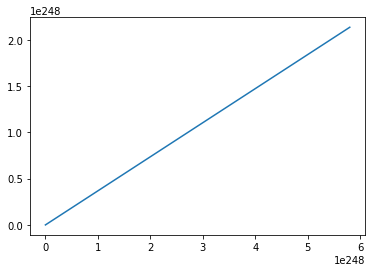

In [41]:
plt.plot(Y(paramsR[1],paramsT[1]),X(paramsR[1],paramsT[1]))

In [42]:
X(paramsR[0][-1],paramsT[0][-1])

nan

In [43]:
X(paramsR[0][0],paramsT[0][0])

129557400406.15202

In [44]:
paramsR[0][-1]-paramsR[0][0]

nan

### Two body problem

$$
\ddot{x} = -\frac{1+q}{r^3}x
$$

$$
\ddot{y} = -\frac{1+q}{r^3}y
$$

$$
q = \frac{m}{M}
$$

\begin{cases}
u_1 = x\\
u_2 = y\\
u_3 = \dot{x}\\
u_4 = \dot{y}
\end{cases}

E

\begin{cases}
\dot{u_1} = u_3\\
\dot{u_2} = u_4\\
\dot{u_3} = -\frac{1+q}{r^3}x\\
\dot{u_4} = -\frac{1+q}{r^3}y
\end{cases}

In [77]:
u = [1,0,2,3]
q = 0.5
e = 0.7

rx = [1,0]
ry = [0,0]

def model(y=0,t=0):
    du = [0,0,0,0]
    r = u[:2]
    norm_r = np.sqrt(r[0]**2 + r[1]**2)
    for i in range(2):
        du[i] = u[i+2]
        du[i+2] = (-1+q)*r[i]/norm_r**3
    return du


In [78]:
model()

[2, 3, -0.5, -0.0]

In [51]:
r

[1, 2]

In [82]:


#!/usr/bin/env python
"""
An improved version of my Python-based gravity simulator, using Runge-Kutta
4th order solution of the differential equations - coded during Xmas 2012.
Happy holidays, everyone!

I've always been fascinated by space - ever since I read 'The Family of
the Sun', when I was young. And I always wanted to simulate what I've read
about Newton's gravity law, and see what happens in... a universe of my own
making :-)

So: The following code 'sprays' some 'planets' randomly, around a sun,
inside a 900x600 window (the values are below, change them at will).
Afterwards, it applies a very simple set of laws:

- Gravity, inversely proportional to the square of the distance, and linearly
  proportional to the product of the two masses
- Elastic collissions of two objects if they are close enough to touch: a
  merged object is then created, that maintains the momentum (mass*velocity)
  and the mass of the two merged ones.
- This updated version of the code is using the RK4 solution of the velocity/
  acceleration differential equation, and is in fact based on the excellent
  blog of Glenn Fiedler (http://gafferongames.com)

Use the numeric keypad's +/- to zoom in/out, and press SPACE to toggle
showing/hiding the orbits trace.

Blog post at:

    http://users.softlab.ntua.gr/~ttsiod/gravity.html
    http://ttsiodras.github.com/gravity.html

Thanassis Tsiodras
ttsiodras@gmail.com
"""

import sys
import math
import pygame
import random
from collections import defaultdict

# The window size
WIDTH, HEIGHT = 900, 600
WIDTHD2, HEIGHTD2 = WIDTH/2., HEIGHT/2.

# The number of simulated planets
PLANETS = 30

# The density of the planets - used to calculate their mass
# from their volume (i.e. via their radius)
DENSITY = 0.001

# The gravity coefficient - it's my universe, I can pick whatever I want :-)
GRAVITYSTRENGTH = 1.e4

# The global list of planets
g_listOfPlanets = []


class State:
    """Class representing position and velocity."""
    def __init__(self, x, y, vx, vy):
        self._x, self._y, self._vx, self._vy = x, y, vx, vy

    def __repr__(self):
        return 'x:{x} y:{y} vx:{vx} vy:{vy}'.format(
            x=self._x, y=self._y, vx=self._vx, vy=self._vy)


class Derivative:
    """Class representing velocity and acceleration."""
    def __init__(self, dx, dy, dvx, dvy):
        self._dx, self._dy, self._dvx, self._dvy = dx, dy, dvx, dvy

    def __repr__(self):
        return 'dx:{dx} dy:{dy} dvx:{dvx} dvy:{dvy}'.format(
            dx=self._dx, dy=self._dy, dvx=self._dvx, dvy=self._dvy)


class Planet:
    """Class representing a planet. The "_st" member is an instance of "State",
    carrying the planet's position and velocity - while the "_m" and "_r"
    members represents the planet's mass and radius."""
    def __init__(self):
        if PLANETS == 1:
            # A nice example of a planet orbiting around our sun :-)
            self._st = State(150, 300, 0, 2)
        else:
            # otherwise pick a random position and velocity
            self._st = State(
               float(random.randint(0, WIDTH)),
               float(random.randint(0, HEIGHT)),
               float(random.randint(0, 300)/100.)-1.5,
               float(random.randint(0, 300)/100.)-1.5)
        self._r = 1.5
        self.setMassFromRadius()
        self._merged = False

    def __repr__(self):
        return repr(self._st)

    def acceleration(self, state, unused_t):
        """Calculate acceleration caused by other planets on this one."""
        ax = 0.0
        ay = 0.0
        for p in g_listOfPlanets:
            if p is self or p._merged:
                continue  # ignore ourselves and merged planets
            dx = p._st._x - state._x
            dy = p._st._y - state._y
            dsq = dx*dx + dy*dy  # distance squared
            dr = math.sqrt(dsq)  # distance
            force = GRAVITYSTRENGTH*self._m*p._m/dsq if dsq>1e-10 else 0.
            # Accumulate acceleration...
            ax += force*dx/dr
            ay += force*dy/dr
        return (ax, ay)

    def initialDerivative(self, state, t):
        """Part of Runge-Kutta method."""
        ax, ay = self.acceleration(state, t)
        return Derivative(state._vx, state._vy, ax, ay)

    def nextDerivative(self, initialState, derivative, t, dt):
        """Part of Runge-Kutta method."""
        state = State(0., 0., 0., 0.)
        state._x = initialState._x + derivative._dx*dt
        state._y = initialState._y + derivative._dy*dt
        state._vx = initialState._vx + derivative._dvx*dt
        state._vy = initialState._vy + derivative._dvy*dt
        ax, ay = self.acceleration(state, t+dt)
        return Derivative(state._vx, state._vy, ax, ay)

    def updatePlanet(self, t, dt):
        """Runge-Kutta 4th order solution to update planet's pos/vel."""
        a = self.initialDerivative(self._st, t)
        b = self.nextDerivative(self._st, a, t, dt*0.5)
        c = self.nextDerivative(self._st, b, t, dt*0.5)
        d = self.nextDerivative(self._st, c, t, dt)
        dxdt = 1.0/6.0 * (a._dx + 2.0*(b._dx + c._dx) + d._dx)
        dydt = 1.0/6.0 * (a._dy + 2.0*(b._dy + c._dy) + d._dy)
        dvxdt = 1.0/6.0 * (a._dvx + 2.0*(b._dvx + c._dvx) + d._dvx)
        dvydt = 1.0/6.0 * (a._dvy + 2.0*(b._dvy + c._dvy) + d._dvy)
        self._st._x += dxdt*dt
        self._st._y += dydt*dt
        self._st._vx += dvxdt*dt
        self._st._vy += dvydt*dt

    def setMassFromRadius(self):
        """From _r, set _m: The volume is (4/3)*Pi*(r^3)..."""
        self._m = DENSITY*4.*math.pi*(self._r**3.)/3.

    def setRadiusFromMass(self):
        """Reversing the setMassFromRadius formula, to calculate radius from
        mass (used after merging of two planets - mass is added, and new
        radius is calculated from this)"""
        self._r = (3.*self._m/(DENSITY*4.*math.pi))**(0.3333)


def main():
    pygame.init()
    win=pygame.display.set_mode((WIDTH, HEIGHT))

    keysPressed = defaultdict(bool)

    def ScanKeyboard():
        while True:
            # Update the keysPressed state:
            evt = pygame.event.poll()
            if evt.type == pygame.NOEVENT:
                break
            elif evt.type in [pygame.KEYDOWN, pygame.KEYUP]:
                keysPressed[evt.key] = evt.type == pygame.KEYDOWN

    global g_listOfPlanets, PLANETS
    if len(sys.argv) == 2:
        PLANETS = int(sys.argv[1])

    # And God said: Let there be lights in the firmament of the heavens...
    g_listOfPlanets = []
    for i in xrange(0, PLANETS):
        g_listOfPlanets.append(Planet())

    def planetsTouch(p1, p2):
        dx = p1._st._x - p2._st._x
        dy = p1._st._y - p2._st._y
        dsq = dx*dx + dy*dy
        dr = math.sqrt(dsq)
        return dr<=(p1._r + p2._r)

    sun = Planet()
    sun._st._x, sun._st._y = WIDTHD2, HEIGHTD2
    sun._st._vx = sun._st._vy = 0.
    sun._m *= 1000
    sun.setRadiusFromMass()
    g_listOfPlanets.append(sun)
    for p in g_listOfPlanets:
        if p is sun:
            continue
        if planetsTouch(p, sun):
            p._merged = True  # ignore planets inside the sun

    # Zoom factor, changed at runtime via the '+' and '-' numeric keypad keys
    zoom = 1.0
    # t and dt are unused in this simulation, but are in general, 
    # parameters of engine (acceleration may depend on them)
    t, dt = 0., 1.

    bClearScreen = True
    pygame.display.set_caption('Gravity simulation (SPACE: show orbits, '
                               'keypad +/- : zoom in/out)')
    while True:
        t += dt
        pygame.display.flip()
        if bClearScreen:  # Show orbits or not?
            win.fill((0, 0, 0))
        win.lock()
        for p in g_listOfPlanets:
            if not p._merged:  # for planets that have not been merged, draw a
                # circle based on their radius, but take zoom factor into account
                pygame.draw.circle(win, (255, 255, 255),
                    (int(WIDTHD2+zoom*WIDTHD2*(p._st._x-WIDTHD2)/WIDTHD2),
                     int(HEIGHTD2+zoom*HEIGHTD2*(p._st._y-HEIGHTD2)/HEIGHTD2)),
                     int(p._r*zoom), 0)
        win.unlock()
        ScanKeyboard()

        # Update all planets' positions and speeds (should normally double
        # buffer the list of planet data, but turns out this is good enough :-)
        for p in g_listOfPlanets:
            if p._merged or p is sun:
                continue
            # Calculate the contributions of all the others to its acceleration
            # (via the gravity force) and update its position and velocity
            p.updatePlanet(t, dt)

        # See if we should merge the ones that are close enough to touch,
        # using elastic collisions (conservation of total momentum)
        for p1 in g_listOfPlanets:
            if p1._merged:
                continue
            for p2 in g_listOfPlanets:
                if p1 is p2 or p2._merged:
                    continue
                if planetsTouch(p1, p2):
                    if p1._m < p2._m:
                        p1, p2 = p2, p1  # p1 is the biggest one (mass-wise)
                    p2._merged = True
                    if p1 is sun:
                        continue  # No-one can move the sun :-)
                    newvx = (p1._st._vx*p1._m+p2._st._vx*p2._m)/(p1._m+p2._m)
                    newvy = (p1._st._vy*p1._m+p2._st._vy*p2._m)/(p1._m+p2._m)
                    p1._m += p2._m  # maintain the mass (just add them)
                    p1.setRadiusFromMass()  # new mass --> new radius
                    p1._st._vx, p1._st._vy = newvx, newvy

        # update zoom factor (numeric keypad +/- keys)
        if keysPressed[pygame.K_KP_PLUS]:
            zoom /= 0.99
        if keysPressed[pygame.K_KP_MINUS]:
            zoom /= 1.01
        if keysPressed[pygame.K_ESCAPE]:
            break
        if keysPressed[pygame.K_SPACE]:
            while keysPressed[pygame.K_SPACE]:
                ScanKeyboard()
            bClearScreen = not bClearScreen
            verb = "show" if bClearScreen else "hide"
            pygame.display.set_caption(
                'Gravity simulation (SPACE: '
                '%s orbits, keypad +/- : zoom in/out)' % verb)

if __name__ == "__main__":
    try:
        import psyco
        psyco.profile()
    except:
        print ('Psyco not found, ignoring it')
    main()



pygame 1.9.6
Hello from the pygame community. https://www.pygame.org/contribute.html
Psyco not found, ignoring it


NameError: name 'xrange' is not defined